Md. Tanvir Jawad<br>ID: 21101221

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [ ]:
from modsim import *

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap11.py')

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap12.py')

In [ ]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap13.py')

In [ ]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

from chap13 import sweep_beta
from chap13 import sweep_parameters

In [ ]:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]
frame = sweep_parameters(beta_array, gamma_array)

In [ ]:
frame.head()

,0.2,0.4,0.6,0.8
Parameter,,,,
0.1,0.010756,0.003642,0.002191,0.001567
0.2,0.118984,0.010763,0.005447,0.003644
0.3,0.589095,0.030185,0.010771,0.006526
0.4,0.801339,0.131563,0.020917,0.010780
0.5,0.896577,0.396409,0.046140,0.017640


In [ ]:
for gamma in frame.columns:
    column = frame[gamma]
    for beta in column.index:
        metric = column[beta]
        print(beta, gamma, metric)

0.1 0.2 0.010756340768063644
0.2 0.2 0.11898421353185373
0.3 0.2 0.5890954199973404
0.4 0.2 0.8013385277185551
0.5 0.2 0.8965769637207062
0.6 0.2 0.942929291399791
0.7 0.2 0.966299311298026
0.8 0.2 0.9781518959989762
0.9 0.2 0.9840568957948106
1.0 0.2 0.9868823507202488
1.1 0.2 0.988148177093735
0.1 0.4 0.0036416926514175607
0.2 0.4 0.010763463373360094
0.3 0.4 0.030184952469116566
0.4 0.4 0.131562924303259
0.5 0.4 0.3964094037932606
0.6 0.4 0.5979016626615987
0.7 0.4 0.7284704154876106
0.8 0.4 0.8144604459153759
0.9 0.4 0.8722697237137128
1.0 0.4 0.9116692168795855
1.1 0.4 0.9386802509510287
0.1 0.6 0.002190722188881611
0.2 0.6 0.005446688837466351
0.3 0.6 0.010771139974975585
0.4 0.6 0.020916599304195316
0.5 0.6 0.04614035896610047
0.6 0.6 0.13288938996079536
0.7 0.6 0.3118432512847451
0.8 0.6 0.47832565854255393
0.9 0.6 0.605687582114665
1.0 0.6 0.7014254793376209
1.1 0.6 0.7738176405451065
0.1 0.8 0.0015665254038139675
0.2 0.8 0.003643953969662994
0.3 0.8 0.006526163529085194
0.4 0

In [ ]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta/gamma, metric, '.', color='C1')

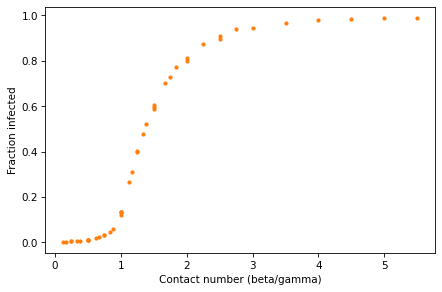

In [ ]:
plot_sweep_frame(frame)

decorate(xlabel='Contact number (beta/gamma)',
         ylabel='Fraction infected')

In [ ]:
s_inf_array = linspace(0.003, 0.99, 50)

In [ ]:
from numpy import log

c_array = log(s_inf_array) / (s_inf_array - 1)

In [ ]:
frac_infected = 1 - s_inf_array
frac_infected_series = make_series(c_array, frac_infected)

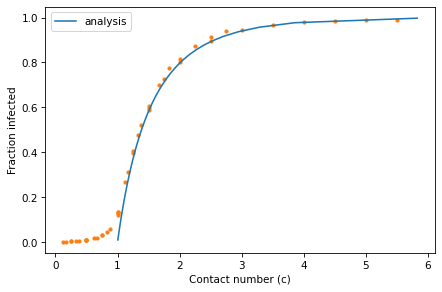

In [ ]:
plot_sweep_frame(frame)
frac_infected_series.plot(label='analysis')

decorate(xlabel='Contact number (c)',
         ylabel='Fraction infected')

In [ ]:
def plot_sweep_frame_difference(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta - gamma, metric, '.', color='C1')

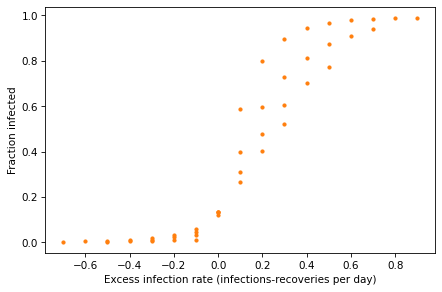

In [ ]:
plot_sweep_frame_difference(frame)

decorate(xlabel='Excess infection rate (infections-recoveries per day)',
         ylabel='Fraction infected')

The outcomes do not adhere to a predictable curve. Therefore, if we possess information about the disparity between beta and gamma but lack details about their ratio, it is insufficient to forecast the proportion of individuals infected.

In [ ]:
show(frac_infected_series)

,values
index,
5.826623,0.997000
3.855292,0.976857
3.281996,0.956714
2.944613,0.936571
2.708398,0.916429
2.528340,0.896286
2.383888,0.876143
2.263951,0.856000
2.161874,0.835857


The infection rate appears to be 0.26 when the contact number is approximately 1.16.

In [ ]:
def sweep_beta_max(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = results.i.max()
    return sweep
def sweep_parameters_max(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_max(beta_array, gamma)
    return frame
frame_max = sweep_parameters_max(beta_array, gamma_array)

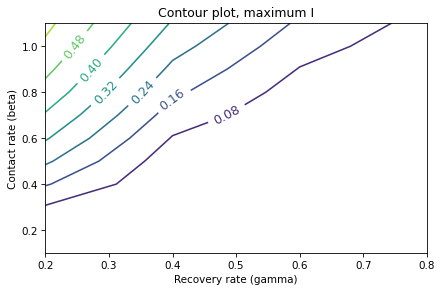

In [ ]:
contour(frame_max)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, maximum I')

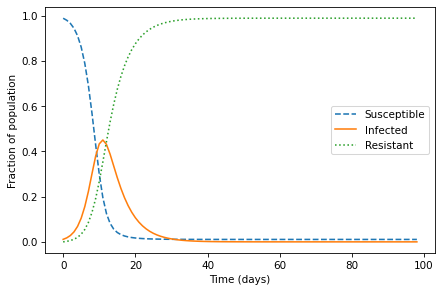

In [ ]:
system = make_system(0.8, 0.2)
results = run_simulation(system, update_func)
plot_results(results.s, results.i, results.r)

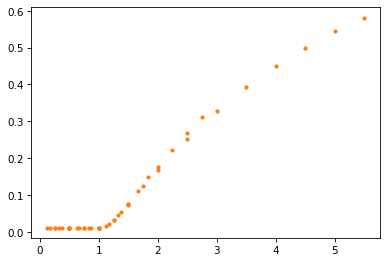

In [ ]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        series = frame[gamma]
        for beta in series.index:
            metric = series[beta]
            plot(beta/gamma, metric, '.', color='C1')
plot_sweep_frame(frame_max)

**MODIFICATION**

Exercise 4 explores the "Time to Peak" as a metric during an epidemic, providing insights into resource planning and intervention strategies. The exercise involves the following steps:

In [ ]:
# Step 1: Write a function sweep_beta_time_to_peak

def sweep_beta_time_to_peak(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        time_to_peak = results.i.idxmax()  # Index of the maximum infected value is the time to peak
        sweep[beta] = time_to_peak
    return sweep


In [ ]:
# Step 2: Write a function sweep_parameters_time_to_peak

def sweep_parameters_time_to_peak(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta_time_to_peak(beta_array, gamma)
    return frame



In [ ]:
# Step 3: Create a SweepFrame named frame_time_to_peak

beta_array = linspace(0.1, 2, 21)
gamma_array = linspace(0.1, 1, 11)

frame_time_to_peak = sweep_parameters_time_to_peak(beta_array, gamma_array)


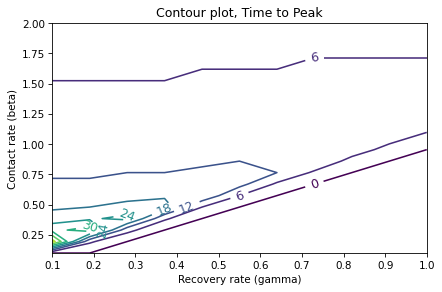

In [ ]:
# Step 4: Create a contour plot for "Time to Peak"

contour(frame_time_to_peak)

decorate(xlabel='Recovery rate (gamma)',
         ylabel='Contact rate (beta)',
         title='Contour plot, Time to Peak')


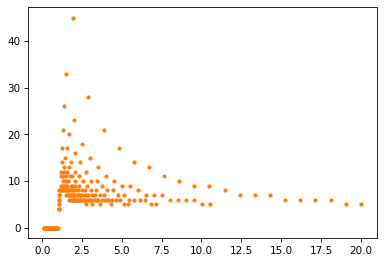

In [ ]:
# Step 5: Plot the "Time to Peak" as a function of the contact number (beta/gamma)

plot_sweep_frame(frame_time_to_peak)
